In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  
import xgboost as xgb
import xgboost
import shap
from sklearn import metrics
from numpy import interp
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, make_scorer, precision_score, brier_score_loss,roc_curve, roc_auc_score, auc, classification_report, precision_recall_curve, f1_score
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_validate, KFold
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

In [2]:
Data = pd.read_csv('C:/Users/71908/Desktop/Predictors for extubation/data/data-final.csv')
Data

,group_7d,group_48h,age,bmi,surgery_type,hb_mean,platelet_mean,wbc_mean,po2_mean,pco2_mean,...,fio2_mean,hr_mean,mbp_mean,spo2_mean,congestive_heart_failure,cerebrovascular_disease,chronic_pulmonary_disease,renal_disease,liver_disease,diabetes
0,0,0,71.489037,31.799974,2,9.275,166.250000,15.000000,146.77777,50.555557,...,47.500000,76.393936,67.891891,97.038460,1,0,1,0,0,1
1,0,0,56.219223,32.744930,1,9.050,92.000000,18.049999,147.20000,37.400002,...,40.000000,86.080002,92.599998,97.839996,1,0,0,1,0,0
2,1,1,86.771370,27.262625,1,9.800,67.666664,12.750000,76.00000,37.285713,...,70.833336,90.595238,64.511627,93.761902,1,0,1,1,1,1
3,1,0,85.973587,23.985310,3,10.200,186.000000,21.600000,118.60000,33.200001,...,40.909092,78.500000,73.941177,98.606064,1,0,0,1,0,0
4,0,0,76.054535,28.405506,1,10.700,187.000000,13.100000,117.00000,39.599998,...,42.857143,70.919998,75.599998,96.480003,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0,0,78.832451,29.414825,1,9.250,164.000000,9.750000,114.60000,33.599998,...,43.750000,80.807693,77.057693,99.230766,0,0,0,1,0,0
772,0,0,66.436714,22.733261,1,9.025,167.666670,9.633333,225.75000,38.000000,...,50.000000,69.218750,62.806450,97.645164,1,1,1,0,0,0
773,0,0,69.815598,33.587898,2,9.600,162.000000,24.799999,94.50000,39.500000,...,63.000000,97.599998,70.440002,93.961540,1,1,0,0,0,1
774,0,0,55.665543,31.208057,2,9.875,89.750000,18.875000,91.50000,38.750000,...,38.333332,80.519997,73.048782,96.879997,1,0,1,0,0,0


In [3]:
Features = Data.drop(columns=['group_7d','group_48h'])

In [4]:
# Standardize Data
from sklearn import preprocessing

standard_data = Features.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,:] = scaler.fit_transform(Features.iloc[:,:])
standard_data

,age,bmi,surgery_type,hb_mean,platelet_mean,wbc_mean,po2_mean,pco2_mean,pao2fio2ratio_mean,ph_mean,...,fio2_mean,hr_mean,mbp_mean,spo2_mean,congestive_heart_failure,cerebrovascular_disease,chronic_pulmonary_disease,renal_disease,liver_disease,diabetes
0,0.141771,0.420092,0.236623,-0.406172,0.388877,0.207961,0.775789,2.452327,-0.067217,-2.478422,...,-0.141853,-0.680949,-0.632913,-0.297334,0.855653,-0.483430,1.526588,-0.701646,-0.327093,1.263059
1,-1.041653,0.577192,-1.047429,-0.592400,-0.606572,0.705990,0.788469,-0.152296,1.568249,1.486861,...,-0.898619,0.090993,3.079537,0.164730,0.855653,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
2,1.326165,-0.334248,-1.047429,0.028363,-0.932803,-0.159437,-1.349745,-0.174924,-1.806676,-1.476447,...,2.212530,0.450840,-1.140805,-2.186182,0.855653,-0.483430,1.526588,1.425219,3.057232,1.263059
3,1.264336,-0.879105,1.520675,0.359437,0.653660,1.285663,-0.070420,-0.983840,0.483419,0.293961,...,-0.806890,-0.513104,0.276006,0.606348,0.855653,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
4,0.495601,-0.144243,-1.047429,0.773280,0.667067,-0.102286,-0.118470,0.283273,0.044274,0.161418,...,-0.610327,-1.117201,0.525248,-0.619269,0.855653,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.710892,0.023558,-1.047429,-0.426864,0.358712,-0.649301,-0.190545,-0.904646,0.157369,-0.070533,...,-0.520236,-0.329190,0.744270,0.966472,-1.168697,-0.483430,-0.655055,1.425219,-0.327093,-0.791729
772,-0.249788,-1.087260,-1.047429,-0.613093,0.407870,-0.668352,3.147412,-0.033505,2.861121,-0.393606,...,0.110402,-1.252784,-1.397012,0.052415,0.855653,2.068553,1.526588,-0.701646,-0.327093,-0.791729
773,0.012078,0.717336,0.236623,-0.137173,0.331899,1.808185,-0.794170,0.263475,-0.671163,-2.795973,...,1.422130,1.009093,-0.250053,-2.071096,0.855653,2.068553,-0.655055,-0.701646,-0.327093,1.263059
774,-1.084563,0.321685,0.236623,0.090440,-0.636737,0.840703,-0.884263,0.114985,-0.276563,1.635978,...,-1.066789,-0.352118,0.141922,-0.388683,0.855653,-0.483430,1.526588,-0.701646,-0.327093,-0.791729


In [5]:
X = pd.DataFrame(standard_data)
Y = Data['group_7d']

In [6]:
X_train, X_test, Y_train, Y_test= train_test_split(
    X, Y, 
     random_state=5, train_size=0.8)

In [7]:
# estimate scale_pos_weight value
counter_train = Counter(Y_train)
estimate_train = counter_train[0] / counter_train[1]
estimate_train

2.757575757575758

In [8]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print (classification_report(y_true, y_pred,digits=3)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [9]:
# CV model
scoring = {'report':    make_scorer(classification_report_with_accuracy_score),
           'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'sensitivity'  : make_scorer(recall_score),
           'specificity': make_scorer(recall_score,pos_label=0),
           'F-1': make_scorer(f1_score),
           'auc': make_scorer(roc_auc_score, needs_proba=True),
           'brier_score':make_scorer(brier_score_loss, needs_proba=True)
          }

In [10]:
# fit model no training data 
xgb_model =  xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.5, learning_rate=0.005, 
                              max_depth=12, n_estimators=900, scale_pos_weight=estimate_train)

In [11]:
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_validate(xgb_model, X_train, Y_train, cv=kfold,scoring=scoring)
print("Accuracy: %.2f%% (%.2f%%)" % (results['test_accuracy'].mean()*100, results['test_accuracy'].std()*100))
print("Precision: %.2f%% (%.2f%%)" % (results['test_precision'].mean()*100, results['test_precision'].std()*100))
print("Sensitivity: %.2f%% (%.2f%%)" % (results['test_sensitivity'].mean()*100, results['test_sensitivity'].std()*100))
print("Specificity: %.2f%% (%.2f%%)" % (results['test_specificity'].mean()*100, results['test_specificity'].std()*100))
print("F-1: %.2f%% (%.2f%%)" % (results['test_F-1'].mean()*100, results['test_F-1'].std()*100))
print("AUC: %.2f%% (%.2f%%)" % (results['test_auc'].mean()*100, results['test_auc'].std()*100))

              precision    recall  f1-score   support

           0      0.777     0.879     0.825        91
           1      0.476     0.303     0.370        33

    accuracy                          0.726       124
   macro avg      0.626     0.591     0.598       124
weighted avg      0.697     0.726     0.704       124

              precision    recall  f1-score   support

           0      0.771     0.890     0.827        91
           1      0.474     0.273     0.346        33

    accuracy                          0.726       124
   macro avg      0.623     0.581     0.586       124
weighted avg      0.692     0.726     0.699       124

              precision    recall  f1-score   support

           0      0.821     0.857     0.839        91
           1      0.552     0.485     0.516        33

    accuracy                          0.758       124
   macro avg      0.686     0.671     0.677       124
weighted avg      0.749     0.758     0.753       124

              preci

In [12]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
xgb_model.fit(X_train, Y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.06935	validation_0-logloss:0.68965	validation_1-error:0.35256	validation_1-logloss:0.69176
[1]	validation_0-error:0.02419	validation_0-logloss:0.68633	validation_1-error:0.31410	validation_1-logloss:0.69007
[2]	validation_0-error:0.01290	validation_0-logloss:0.68356	validation_1-error:0.30769	validation_1-logloss:0.68894
[3]	validation_0-error:0.01290	validation_0-logloss:0.68040	validation_1-error:0.28205	validation_1-logloss:0.68735
[4]	validation_0-error:0.00323	validation_0-logloss:0.67721	validation_1-error:0.26923	validation_1-logloss:0.68615
[5]	validation_0-error:0.00484	validation_0-logloss:0.67391	validation_1-error:0.25641	validation_1-logloss:0.68443
[6]	validation_0-error:0.00161	validation_0-logloss:0.67084	validation_1-error:0.25000	validation_1-logloss:0.68292
[7]	validation_0-error:0.00323	validation_0-logloss:0.66779	validation_1-error:0.22436	validation_1-logloss:0.68144
[8]	validation_0-error:0.00323	validation_0-logloss:0.66467	validation_1

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[28]	validation_0-error:0.00000	validation_0-logloss:0.60634	validation_1-error:0.19231	validation_1-logloss:0.65228
[29]	validation_0-error:0.00000	validation_0-logloss:0.60378	validation_1-error:0.19231	validation_1-logloss:0.65129
[30]	validation_0-error:0.00000	validation_0-logloss:0.60110	validation_1-error:0.19231	validation_1-logloss:0.64966
[31]	validation_0-error:0.00000	validation_0-logloss:0.59845	validation_1-error:0.18590	validation_1-logloss:0.64823
[32]	validation_0-error:0.00000	validation_0-logloss:0.59571	validation_1-error:0.19231	validation_1-logloss:0.64698
[33]	validation_0-error:0.00000	validation_0-logloss:0.59311	validation_1-error:0.19231	validation_1-logloss:0.64577
[34]	validation_0-error:0.00000	validation_0-logloss:0.59047	validation_1-error:0.19231	validation_1-logloss:0.64495
[35]	validation_0-error:0.00000	validation_0-logloss:0.58788	validation_1-error:0.19872	validation_1-logloss:0.64377
[36]	validation_0-error:0.00000	validation_0-logloss:0.58543	val

[99]	validation_0-error:0.00000	validation_0-logloss:0.44848	validation_1-error:0.21154	validation_1-logloss:0.58020
[100]	validation_0-error:0.00000	validation_0-logloss:0.44666	validation_1-error:0.21795	validation_1-logloss:0.57937
[101]	validation_0-error:0.00000	validation_0-logloss:0.44478	validation_1-error:0.21154	validation_1-logloss:0.57846
[102]	validation_0-error:0.00000	validation_0-logloss:0.44301	validation_1-error:0.21154	validation_1-logloss:0.57794
[103]	validation_0-error:0.00000	validation_0-logloss:0.44124	validation_1-error:0.21154	validation_1-logloss:0.57721
[104]	validation_0-error:0.00000	validation_0-logloss:0.43948	validation_1-error:0.21154	validation_1-logloss:0.57637
[105]	validation_0-error:0.00000	validation_0-logloss:0.43765	validation_1-error:0.20513	validation_1-logloss:0.57587
[106]	validation_0-error:0.00000	validation_0-logloss:0.43592	validation_1-error:0.21154	validation_1-logloss:0.57487
[107]	validation_0-error:0.00000	validation_0-logloss:0.4

[169]	validation_0-error:0.00000	validation_0-logloss:0.34208	validation_1-error:0.20513	validation_1-logloss:0.53464
[170]	validation_0-error:0.00000	validation_0-logloss:0.34080	validation_1-error:0.20513	validation_1-logloss:0.53424
[171]	validation_0-error:0.00000	validation_0-logloss:0.33951	validation_1-error:0.20513	validation_1-logloss:0.53350
[172]	validation_0-error:0.00000	validation_0-logloss:0.33826	validation_1-error:0.20513	validation_1-logloss:0.53319
[173]	validation_0-error:0.00000	validation_0-logloss:0.33701	validation_1-error:0.20513	validation_1-logloss:0.53260
[174]	validation_0-error:0.00000	validation_0-logloss:0.33573	validation_1-error:0.20513	validation_1-logloss:0.53198
[175]	validation_0-error:0.00000	validation_0-logloss:0.33453	validation_1-error:0.20513	validation_1-logloss:0.53162
[176]	validation_0-error:0.00000	validation_0-logloss:0.33329	validation_1-error:0.20513	validation_1-logloss:0.53091
[177]	validation_0-error:0.00000	validation_0-logloss:0.

[239]	validation_0-error:0.00000	validation_0-logloss:0.26818	validation_1-error:0.19231	validation_1-logloss:0.50277
[240]	validation_0-error:0.00000	validation_0-logloss:0.26727	validation_1-error:0.20513	validation_1-logloss:0.50235
[241]	validation_0-error:0.00000	validation_0-logloss:0.26640	validation_1-error:0.20513	validation_1-logloss:0.50221
[242]	validation_0-error:0.00000	validation_0-logloss:0.26548	validation_1-error:0.19872	validation_1-logloss:0.50164
[243]	validation_0-error:0.00000	validation_0-logloss:0.26467	validation_1-error:0.19872	validation_1-logloss:0.50106
[244]	validation_0-error:0.00000	validation_0-logloss:0.26373	validation_1-error:0.19872	validation_1-logloss:0.50081
[245]	validation_0-error:0.00000	validation_0-logloss:0.26290	validation_1-error:0.19872	validation_1-logloss:0.50064
[246]	validation_0-error:0.00000	validation_0-logloss:0.26200	validation_1-error:0.20513	validation_1-logloss:0.50021
[247]	validation_0-error:0.00000	validation_0-logloss:0.

[309]	validation_0-error:0.00000	validation_0-logloss:0.21486	validation_1-error:0.19872	validation_1-logloss:0.48265
[310]	validation_0-error:0.00000	validation_0-logloss:0.21420	validation_1-error:0.19872	validation_1-logloss:0.48243
[311]	validation_0-error:0.00000	validation_0-logloss:0.21358	validation_1-error:0.19872	validation_1-logloss:0.48220
[312]	validation_0-error:0.00000	validation_0-logloss:0.21296	validation_1-error:0.19872	validation_1-logloss:0.48190
[313]	validation_0-error:0.00000	validation_0-logloss:0.21235	validation_1-error:0.19872	validation_1-logloss:0.48173
[314]	validation_0-error:0.00000	validation_0-logloss:0.21182	validation_1-error:0.19872	validation_1-logloss:0.48159
[315]	validation_0-error:0.00000	validation_0-logloss:0.21114	validation_1-error:0.19872	validation_1-logloss:0.48152
[316]	validation_0-error:0.00000	validation_0-logloss:0.21058	validation_1-error:0.19872	validation_1-logloss:0.48136
[317]	validation_0-error:0.00000	validation_0-logloss:0.

[379]	validation_0-error:0.00000	validation_0-logloss:0.17576	validation_1-error:0.21154	validation_1-logloss:0.47072
[380]	validation_0-error:0.00000	validation_0-logloss:0.17531	validation_1-error:0.21154	validation_1-logloss:0.47061
[381]	validation_0-error:0.00000	validation_0-logloss:0.17485	validation_1-error:0.20513	validation_1-logloss:0.47054
[382]	validation_0-error:0.00000	validation_0-logloss:0.17437	validation_1-error:0.21154	validation_1-logloss:0.47054
[383]	validation_0-error:0.00000	validation_0-logloss:0.17389	validation_1-error:0.21154	validation_1-logloss:0.47032
[384]	validation_0-error:0.00000	validation_0-logloss:0.17339	validation_1-error:0.21154	validation_1-logloss:0.47020
[385]	validation_0-error:0.00000	validation_0-logloss:0.17292	validation_1-error:0.20513	validation_1-logloss:0.46993
[386]	validation_0-error:0.00000	validation_0-logloss:0.17244	validation_1-error:0.20513	validation_1-logloss:0.46965
[387]	validation_0-error:0.00000	validation_0-logloss:0.

[449]	validation_0-error:0.00000	validation_0-logloss:0.14628	validation_1-error:0.19872	validation_1-logloss:0.46348
[450]	validation_0-error:0.00000	validation_0-logloss:0.14592	validation_1-error:0.19872	validation_1-logloss:0.46335
[451]	validation_0-error:0.00000	validation_0-logloss:0.14556	validation_1-error:0.20513	validation_1-logloss:0.46343
[452]	validation_0-error:0.00000	validation_0-logloss:0.14519	validation_1-error:0.20513	validation_1-logloss:0.46339
[453]	validation_0-error:0.00000	validation_0-logloss:0.14485	validation_1-error:0.20513	validation_1-logloss:0.46328
[454]	validation_0-error:0.00000	validation_0-logloss:0.14451	validation_1-error:0.20513	validation_1-logloss:0.46312
[455]	validation_0-error:0.00000	validation_0-logloss:0.14414	validation_1-error:0.20513	validation_1-logloss:0.46321
[456]	validation_0-error:0.00000	validation_0-logloss:0.14377	validation_1-error:0.20513	validation_1-logloss:0.46322
[457]	validation_0-error:0.00000	validation_0-logloss:0.

[519]	validation_0-error:0.00000	validation_0-logloss:0.12372	validation_1-error:0.20513	validation_1-logloss:0.45971
[520]	validation_0-error:0.00000	validation_0-logloss:0.12343	validation_1-error:0.20513	validation_1-logloss:0.45979
[521]	validation_0-error:0.00000	validation_0-logloss:0.12318	validation_1-error:0.20513	validation_1-logloss:0.45968
[522]	validation_0-error:0.00000	validation_0-logloss:0.12290	validation_1-error:0.20513	validation_1-logloss:0.45951
[523]	validation_0-error:0.00000	validation_0-logloss:0.12265	validation_1-error:0.20513	validation_1-logloss:0.45961
[524]	validation_0-error:0.00000	validation_0-logloss:0.12238	validation_1-error:0.20513	validation_1-logloss:0.45956
[525]	validation_0-error:0.00000	validation_0-logloss:0.12209	validation_1-error:0.20513	validation_1-logloss:0.45961
[526]	validation_0-error:0.00000	validation_0-logloss:0.12182	validation_1-error:0.20513	validation_1-logloss:0.45965
[527]	validation_0-error:0.00000	validation_0-logloss:0.

[589]	validation_0-error:0.00000	validation_0-logloss:0.10638	validation_1-error:0.21154	validation_1-logloss:0.45747
[590]	validation_0-error:0.00000	validation_0-logloss:0.10616	validation_1-error:0.21154	validation_1-logloss:0.45738
[591]	validation_0-error:0.00000	validation_0-logloss:0.10592	validation_1-error:0.21154	validation_1-logloss:0.45752
[592]	validation_0-error:0.00000	validation_0-logloss:0.10571	validation_1-error:0.21154	validation_1-logloss:0.45754
[593]	validation_0-error:0.00000	validation_0-logloss:0.10550	validation_1-error:0.21154	validation_1-logloss:0.45751
[594]	validation_0-error:0.00000	validation_0-logloss:0.10527	validation_1-error:0.21154	validation_1-logloss:0.45751
[595]	validation_0-error:0.00000	validation_0-logloss:0.10504	validation_1-error:0.21154	validation_1-logloss:0.45747
[596]	validation_0-error:0.00000	validation_0-logloss:0.10482	validation_1-error:0.21154	validation_1-logloss:0.45753
[597]	validation_0-error:0.00000	validation_0-logloss:0.

[659]	validation_0-error:0.00000	validation_0-logloss:0.09241	validation_1-error:0.21154	validation_1-logloss:0.45708
[660]	validation_0-error:0.00000	validation_0-logloss:0.09223	validation_1-error:0.21154	validation_1-logloss:0.45716
[661]	validation_0-error:0.00000	validation_0-logloss:0.09206	validation_1-error:0.21154	validation_1-logloss:0.45712
[662]	validation_0-error:0.00000	validation_0-logloss:0.09189	validation_1-error:0.21154	validation_1-logloss:0.45717
[663]	validation_0-error:0.00000	validation_0-logloss:0.09172	validation_1-error:0.21154	validation_1-logloss:0.45695
[664]	validation_0-error:0.00000	validation_0-logloss:0.09155	validation_1-error:0.21154	validation_1-logloss:0.45688
[665]	validation_0-error:0.00000	validation_0-logloss:0.09138	validation_1-error:0.21154	validation_1-logloss:0.45682
[666]	validation_0-error:0.00000	validation_0-logloss:0.09123	validation_1-error:0.21154	validation_1-logloss:0.45673
[667]	validation_0-error:0.00000	validation_0-logloss:0.

[729]	validation_0-error:0.00000	validation_0-logloss:0.08133	validation_1-error:0.21154	validation_1-logloss:0.45725
[730]	validation_0-error:0.00000	validation_0-logloss:0.08120	validation_1-error:0.20513	validation_1-logloss:0.45729
[731]	validation_0-error:0.00000	validation_0-logloss:0.08105	validation_1-error:0.21154	validation_1-logloss:0.45729
[732]	validation_0-error:0.00000	validation_0-logloss:0.08090	validation_1-error:0.21154	validation_1-logloss:0.45726
[733]	validation_0-error:0.00000	validation_0-logloss:0.08075	validation_1-error:0.21154	validation_1-logloss:0.45726
[734]	validation_0-error:0.00000	validation_0-logloss:0.08062	validation_1-error:0.21154	validation_1-logloss:0.45726
[735]	validation_0-error:0.00000	validation_0-logloss:0.08048	validation_1-error:0.21154	validation_1-logloss:0.45718
[736]	validation_0-error:0.00000	validation_0-logloss:0.08034	validation_1-error:0.20513	validation_1-logloss:0.45710
[737]	validation_0-error:0.00000	validation_0-logloss:0.

[799]	validation_0-error:0.00000	validation_0-logloss:0.07221	validation_1-error:0.20513	validation_1-logloss:0.45731
[800]	validation_0-error:0.00000	validation_0-logloss:0.07209	validation_1-error:0.20513	validation_1-logloss:0.45723
[801]	validation_0-error:0.00000	validation_0-logloss:0.07197	validation_1-error:0.20513	validation_1-logloss:0.45733
[802]	validation_0-error:0.00000	validation_0-logloss:0.07186	validation_1-error:0.20513	validation_1-logloss:0.45735
[803]	validation_0-error:0.00000	validation_0-logloss:0.07174	validation_1-error:0.20513	validation_1-logloss:0.45744
[804]	validation_0-error:0.00000	validation_0-logloss:0.07162	validation_1-error:0.20513	validation_1-logloss:0.45758
[805]	validation_0-error:0.00000	validation_0-logloss:0.07150	validation_1-error:0.20513	validation_1-logloss:0.45762
[806]	validation_0-error:0.00000	validation_0-logloss:0.07138	validation_1-error:0.20513	validation_1-logloss:0.45773
[807]	validation_0-error:0.00000	validation_0-logloss:0.

[869]	validation_0-error:0.00000	validation_0-logloss:0.06485	validation_1-error:0.21154	validation_1-logloss:0.45973
[870]	validation_0-error:0.00000	validation_0-logloss:0.06475	validation_1-error:0.19872	validation_1-logloss:0.45984
[871]	validation_0-error:0.00000	validation_0-logloss:0.06465	validation_1-error:0.19872	validation_1-logloss:0.45977
[872]	validation_0-error:0.00000	validation_0-logloss:0.06456	validation_1-error:0.19872	validation_1-logloss:0.45979
[873]	validation_0-error:0.00000	validation_0-logloss:0.06446	validation_1-error:0.19872	validation_1-logloss:0.45979
[874]	validation_0-error:0.00000	validation_0-logloss:0.06437	validation_1-error:0.20513	validation_1-logloss:0.45980
[875]	validation_0-error:0.00000	validation_0-logloss:0.06427	validation_1-error:0.20513	validation_1-logloss:0.45979
[876]	validation_0-error:0.00000	validation_0-logloss:0.06416	validation_1-error:0.19872	validation_1-logloss:0.45977
[877]	validation_0-error:0.00000	validation_0-logloss:0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=900, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [13]:
xgb_y_pred_test = xgb_model.predict(X_test)
xgb_y_preds_proba_test = xgb_model.predict_proba(X_test)

In [14]:
xgb_predictions_test = []
for value in xgb_y_preds_proba_test[:, 1]:
    if value < 0:
        value = 0
    if value > 1:
        value = 1
    else:
        value
    xgb_predictions_test.append(value)

In [15]:
# #計算auc
xgbc_auc_test = roc_auc_score(Y_test, xgb_y_preds_proba_test[:, 1])
xgb_fpr_test, xgb_tpr_test, xgb_thresholds_test = roc_curve(Y_test, xgb_y_preds_proba_test[:, 1]) 

In [16]:
# performance 
print('Model: XGBOOST\n')
print(classification_report(Y_test, xgb_y_pred_test,
      target_names=['Not Ready (Class 0)', 'Ready (Class 1)'],digits=3))
print(f'Accuracy Score: {accuracy_score(Y_test,xgb_y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(Y_test, xgb_y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, xgb_predictions_test)}')
print(f'Recall score: {recall_score(Y_test,xgb_y_pred_test)}')
print(f'Brier score: {brier_score_loss(Y_test, xgb_predictions_test)}')
print("###########################################################\n")

Model: XGBOOST

                     precision    recall  f1-score   support

Not Ready (Class 0)      0.809     0.948     0.873       116
    Ready (Class 1)      0.700     0.350     0.467        40

           accuracy                          0.795       156
          macro avg      0.754     0.649     0.670       156
       weighted avg      0.781     0.795     0.769       156

Accuracy Score: 0.7948717948717948
Confusion Matrix: 
[[110   6]
 [ 26  14]]
Area Under Curve: 0.793103448275862
Recall score: 0.35
Brier score: 0.1500157755392775
###########################################################



In [17]:
from matplotlib import pyplot

In [18]:
# retrieve performance metrics
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

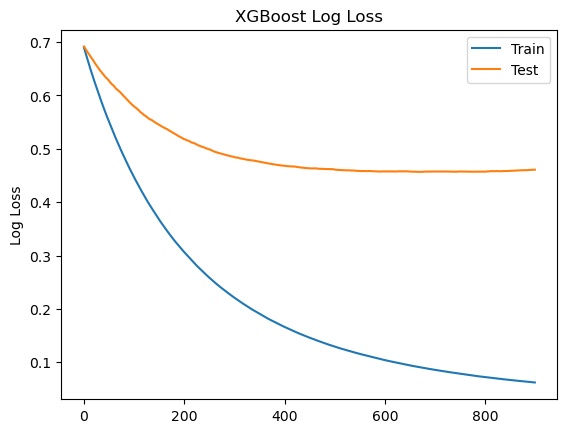

In [19]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

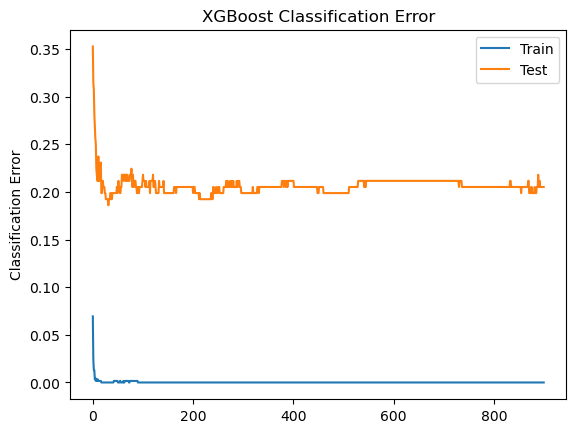

In [20]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

color is redundantly defined by the 'color' keyword argument and the fmt string "black" (-> color=(0.0, 0.0, 0.0, 1.0)). The keyword argument will take precedence.


<Figure size 640x480 with 0 Axes>

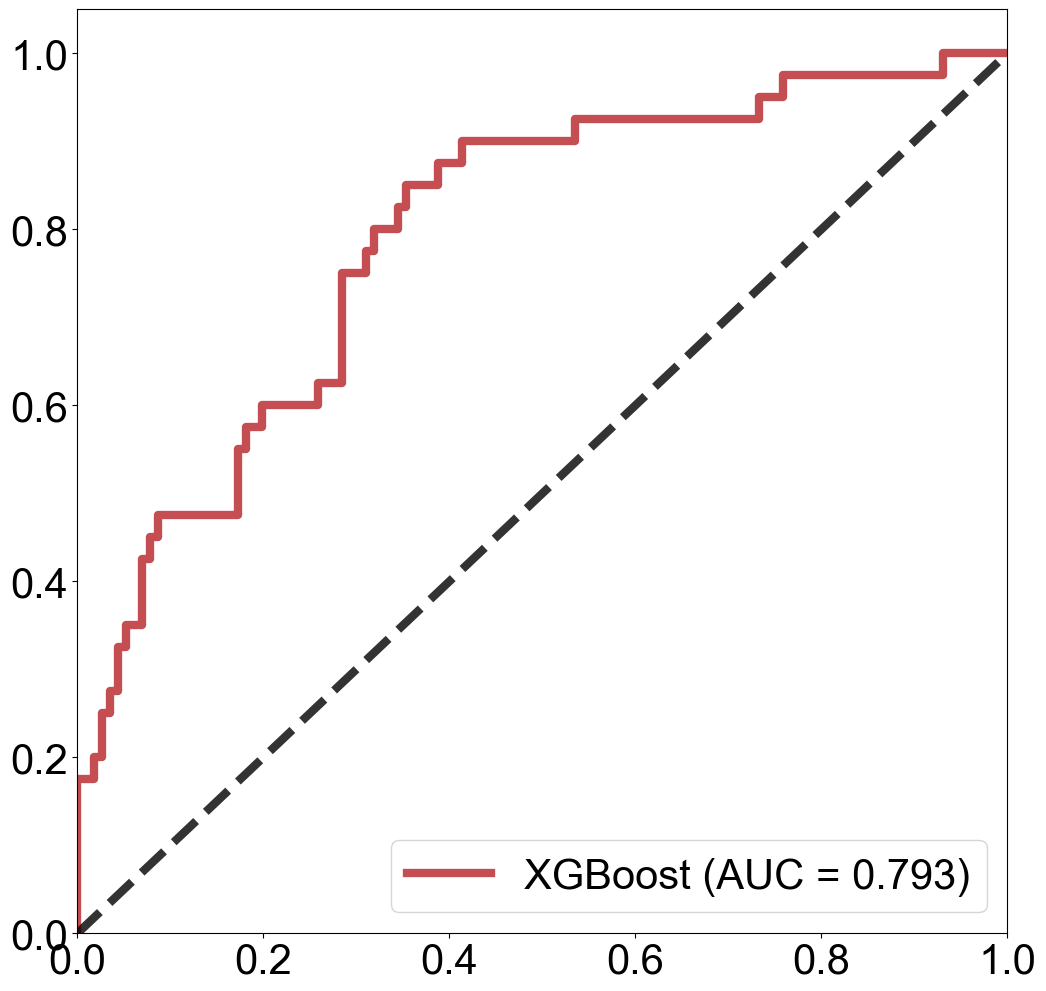

In [21]:
# ROC CURVE
plt.figure()
plt.figure(figsize=(12, 12))
plt.plot(xgb_fpr_test, xgb_tpr_test, 'black', label='XGBoost (AUC = %0.3f)' %xgbc_auc_test, color='r',lw=6)
plt.plot([0, 1], [0, 1], color='black', lw=6, linestyle='--', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.xlabel('False Positive Rate', fontsize=40)
# plt.ylabel('True Positive Rate', fontsize=40)
# plt.title('ROC CURVE (30 DAY)', fontsize=50)
plt.legend(loc="lower right",fontsize=30)
sns.set(style='white') 
plt.rcParams["font.weight"] = "bold"
# sns.despine(top=True, right= True) 
# plt.grid(False)
# plt.show() 
#plt.savefig('ROC(Testing,365).tif', format='tif', dpi=300, bbox_inches='tight')

pt 0.0, TP 40.0, FP 116.0, net_bf 0.2564102564102564
pt 0.01, TP 40.0, FP 116.0, net_bf 0.24889924889924891
pt 0.02, TP 40.0, FP 113.0, net_bf 0.24162742019884875
pt 0.03, TP 40.0, FP 108.0, net_bf 0.23499867829764737
pt 0.04, TP 39.0, FP 104.0, net_bf 0.2222222222222222
pt 0.05, TP 39.0, FP 93.0, net_bf 0.21862348178137653
pt 0.06, TP 37.0, FP 85.0, net_bf 0.20240043644298963
pt 0.07, TP 37.0, FP 78.0, net_bf 0.19954507857733664
pt 0.08, TP 37.0, FP 73.0, net_bf 0.19648829431438125
pt 0.09, TP 37.0, FP 64.0, net_bf 0.19660467737390816
pt 0.1, TP 36.0, FP 62.0, net_bf 0.1866096866096866
pt 0.11, TP 36.0, FP 55.0, net_bf 0.18719389225007202
pt 0.12, TP 36.0, FP 53.0, net_bf 0.18444055944055945
pt 0.13, TP 36.0, FP 49.0, net_bf 0.18383436486884763
pt 0.14, TP 35.0, FP 48.0, net_bf 0.17426952892069172
pt 0.15, TP 34.0, FP 44.0, net_bf 0.16817496229260934
pt 0.16, TP 34.0, FP 42.0, net_bf 0.16666666666666666
pt 0.17, TP 32.0, FP 40.0, net_bf 0.15261044176706826
pt 0.18, TP 32.0, FP 37.0, n

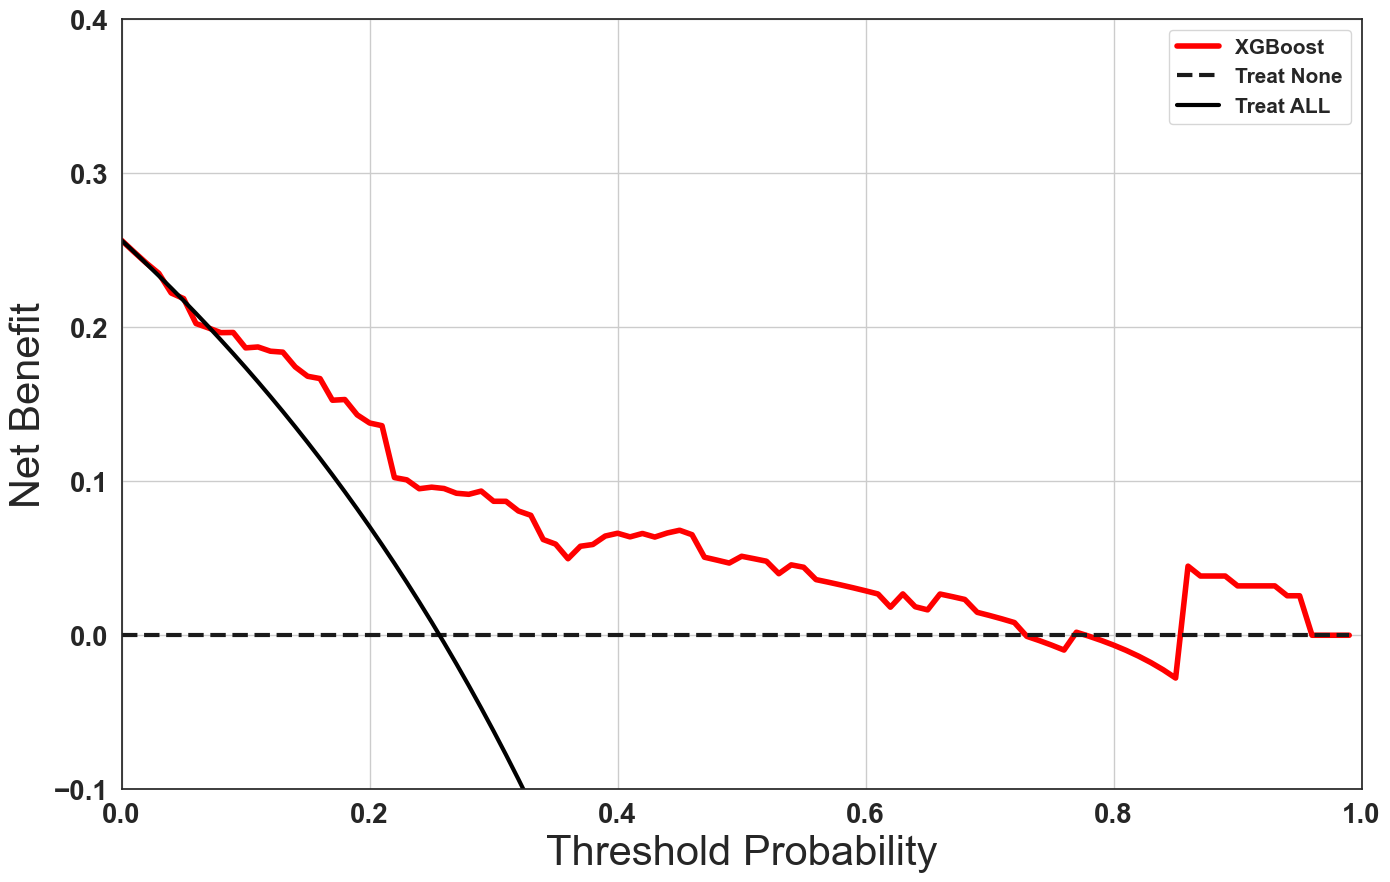

In [22]:
## Decision curve

plt.figure(figsize=(16, 10))
pt_arr = []
net_bnf_arr = []
treatall = []
pred_ans = xgb_y_preds_proba_test[:, 1]


for i in range(0,100,1):
    pt = i /100
    #compiute TP FP
    pred_ans_clip = np.zeros(pred_ans.shape[0])
    for j in range(pred_ans.shape[0]):
        if pred_ans[j] >= pt:
            pred_ans_clip[j] = 1
        else:
            pred_ans_clip[j] = 0
    TP = np.sum((Y_test) * np.round(pred_ans_clip))
    FP = np.sum((1 - Y_test) * np.round(pred_ans_clip))
    net_bnf = ( TP-(FP * pt/(1-pt)) )/Y_test.shape[0]
    print('pt {}, TP {}, FP {}, net_bf {}'.format(pt,TP,FP,net_bnf))
    pt_arr.append(pt)
    net_bnf_arr.append(net_bnf)
    treatall.append((sum(Y_test)-(len(Y_test)-sum(Y_test))*pt/(1-pt))/len(Y_test))



plt.plot(pt_arr, net_bnf_arr, color='red', lw=4,label='XGBoost')             
plt.plot(pt_arr, np.zeros(len(pt_arr)), color='k', lw=3, linestyle='--',label='Treat None')
pt_np = np.array(pt_arr)
plt.plot(pt_arr, treatall , color='black', lw=3 ,label='Treat ALL')
plt.xlim([0.0, 1.0])
plt.ylim([-0.1, 0.4])#plt.legend(loc="right")
#ax=plt.gca()
#x_major_locator=MultipleLocator(0.1)
#ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('Threshold Probability',fontsize=30)
plt.ylabel('Net Benefit',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="upper right", fontsize=15)
plt.grid()

------------------------------------------------
XGBOOST
accuracy = 0.7948717948717948
brier score = 0.1500157755392775


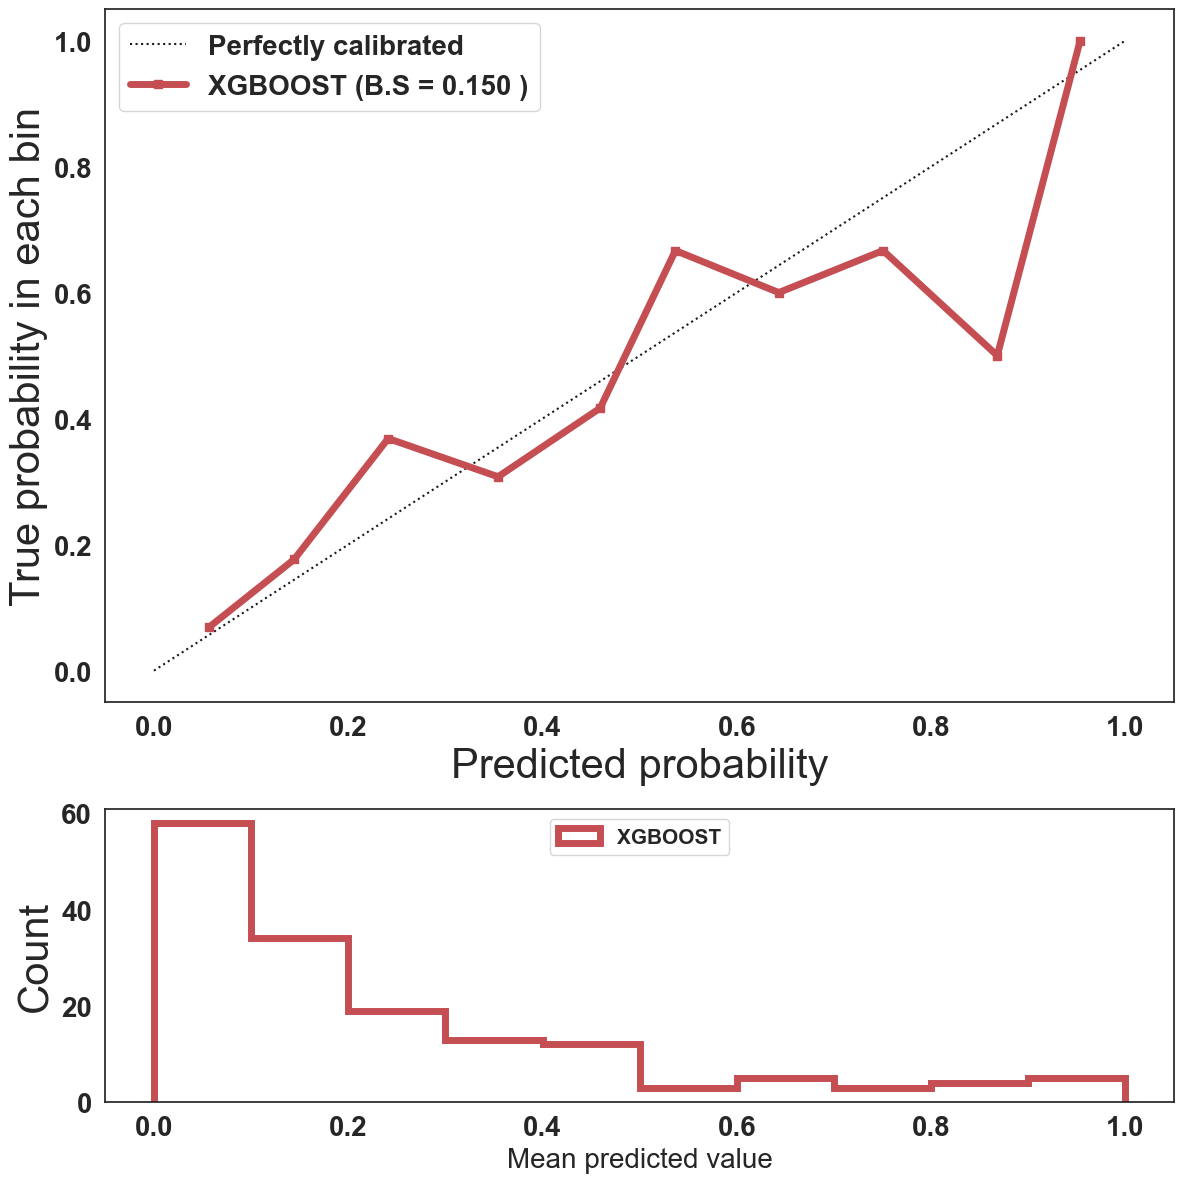

In [23]:
## Plot calibration plots

plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

colors = ['r']

clf_list = [(xgb_model, 'XGBOOST')]

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for i,(clf, name) in enumerate(clf_list):

    # predict probabilities
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, )+ ' (B.S = %0.3f )' % (brier_score_loss(Y_test, prob_pos)), lw=5, color=colors[i])

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=5, color=colors[i])

    print('------------------------------------------------')
    print(name)
    print('accuracy = ' + str(clf.score(X_test, Y_test)))
    print('brier score = ' + str(brier_score_loss(Y_test, prob_pos)))

ax1.set_xlabel("Predicted probability" ,fontsize=30)
ax1.set_ylabel("True probability in each bin" ,fontsize=30)
    
#plt.xlabel("Predicted probability" ,fontsize=40, fontweight='bold')
#plt.ylabel("True probability in each bin" ,fontsize=40, fontweight='bold')
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left" ,fontsize=20)
#ax1.legend(loc="upper left" ,fontsize=27)
#ax1.set_title('Calibration plots' ,fontsize=30)

ax2.set_xlabel("Mean predicted value" ,fontsize=20)
ax2.set_ylabel("Count" ,fontsize=30)
ax2.legend(loc="upper center", ncol=2 ,fontsize=15)

ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
plt.tight_layout()
sns.set(style='white') 
plt.rcParams["font.weight"] = "bold"
#plt.show()

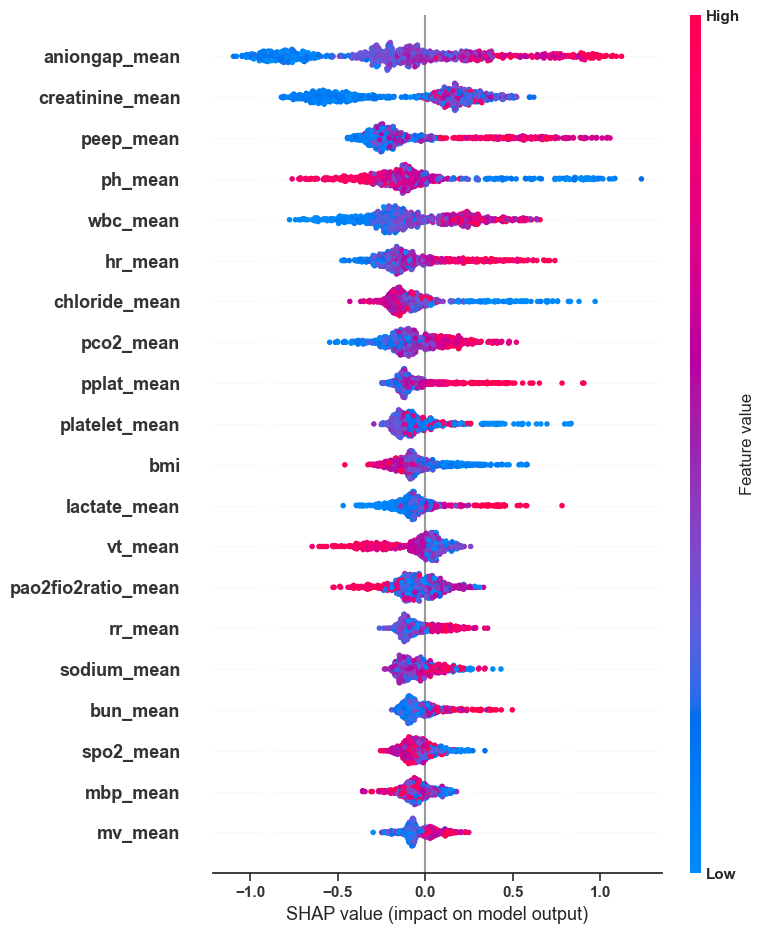

In [27]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(standard_data.iloc[:, :])
shap.summary_plot(shap_values, standard_data.iloc[:, :], show=False)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


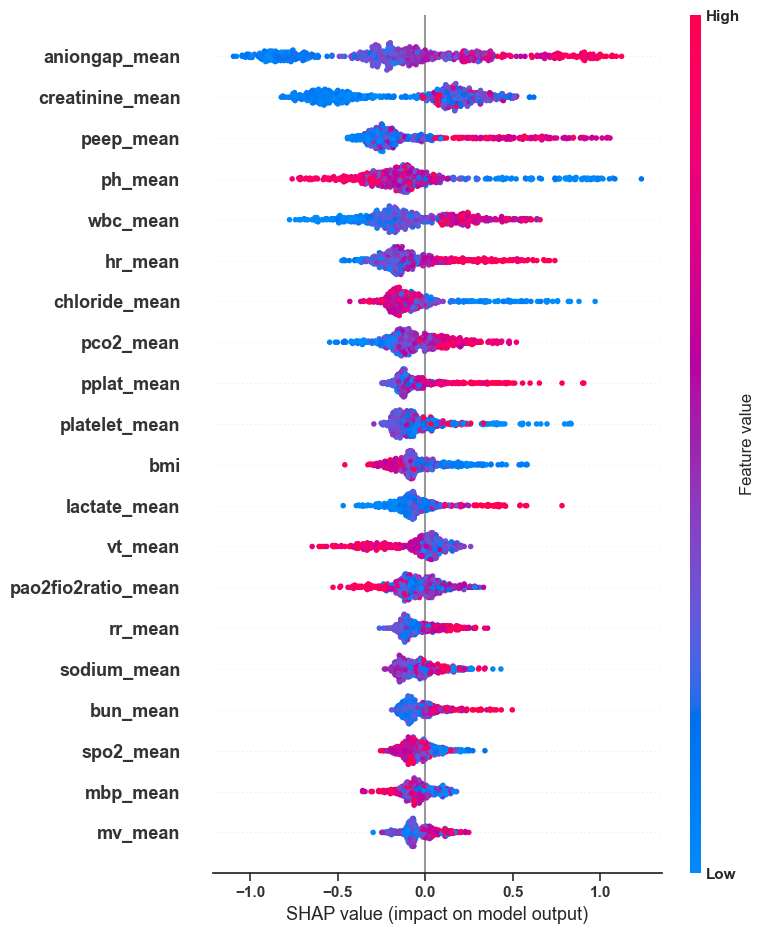

In [24]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, show=False)